* amazon.in 의 COVID-19 관련 이커머스 상품 웹 크롤링 데이터
* 예제) https://www.amazon.in/Aurum-Creations-Disposable-Stretchable-100/dp/B0777HKWJF/

#Part4. [실습11] COVID-19 관련 이커머스 상품 판매 데이터 분석

* matplotlib 한글 깨짐 현상 해결
> 셀 실행 후 런타임 재시작 필요

In [ ]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm
# from matplotlib import pyplot as plt

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# plt.rc('font', family=font_name)

# fm._rebuild()

In [ ]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 01. 데이터 소개 및 분석프로세스 수립
 : "강의자료 → Ch13. [실습11] COVID-19 관련 이커머스 상품 판매 데이터 분석" 참고

## 02. 데이터 준비를 위한 EDA 및 전처리

### 0. 데이터 불러오기

In [ ]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import plotly.express as px
from numpy import random
import missingno

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

import pydot 
from IPython.display import Image


In [ ]:
amz_data=pd.read_csv('/content/drive/MyDrive/강의/실습자료/data/ch13/amz_data.csv')
amz_data.head()

,index,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
0,0,facemasks,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN
1,1,facemasks,Mediweave Reusable 100% Cotton Cloth Face Mask...,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN
2,2,facemasks,RSM 3 Layer Non-Woven Disposable Medical Face ...,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,3,facemasks,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN
4,4,facemasks,Vocado 5 Layer Filter Protection Face Mask Kn9...,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN


In [ ]:
amz_data = amz_data.drop(['index'], axis=1, errors='ignore')
amz_data.head()

,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
0,facemasks,SURGICOMFORT Non Woven Elastic Ear-Loop Dispos...,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN
1,facemasks,Mediweave Reusable 100% Cotton Cloth Face Mask...,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN
2,facemasks,RSM 3 Layer Non-Woven Disposable Medical Face ...,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,facemasks,Steelbird SBA-2 7Wings Unisex Helmet Visor Fac...,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN
4,facemasks,Vocado 5 Layer Filter Protection Face Mask Kn9...,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN


In [ ]:
# 데이터의 모양 알아보기
amz_data.shape

(737, 11)

### 1. 데이터 탐색

#### 1) 데이터 타입

In [ ]:
# 컬럼별 데이터 타입 알아보기
amz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     737 non-null    object 
 1   name        737 non-null    object 
 2   mrp_now     277 non-null    float64
 3   price_now   277 non-null    float64
 4   star1       277 non-null    float64
 5   star2       277 non-null    float64
 6   star3       277 non-null    float64
 7   star4       277 non-null    float64
 8   star5       277 non-null    float64
 9   mrp_then    354 non-null    float64
 10  price_then  354 non-null    float64
dtypes: float64(9), object(2)
memory usage: 63.5+ KB


#### 2) 데이터 통계값

In [ ]:
# 컬럼별 간단한 통계값 보기
amz_data.describe()

,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,354.000000,354.000000
mean,878.779783,454.971119,15.353791,3.285199,4.610108,7.498195,15.353791,3454.415254,1289.576271
std,1275.237633,775.001865,22.030227,7.871355,7.349922,10.935789,22.030227,7671.778390,2441.104903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,45.000000
25%,350.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,499.000000,259.500000
50%,500.000000,265.000000,0.000000,0.000000,0.000000,0.000000,0.000000,998.500000,499.000000
75%,999.000000,449.000000,31.000000,5.000000,9.000000,18.000000,31.000000,2600.000000,1199.750000
max,10360.000000,7246.000000,100.000000,100.000000,32.000000,50.000000,100.000000,60000.000000,22050.000000


#### 3) 결측값

In [ ]:
missing_df = amz_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
9,mrp_then,383
10,price_then,383
2,mrp_now,460
3,price_now,460
4,star1,460
5,star2,460
6,star3,460
7,star4,460
8,star5,460


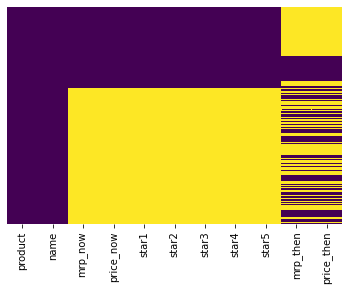

In [ ]:
# seaborn 패키지 heatmap 을 통해 시각화 확인
sns.heatmap(amz_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

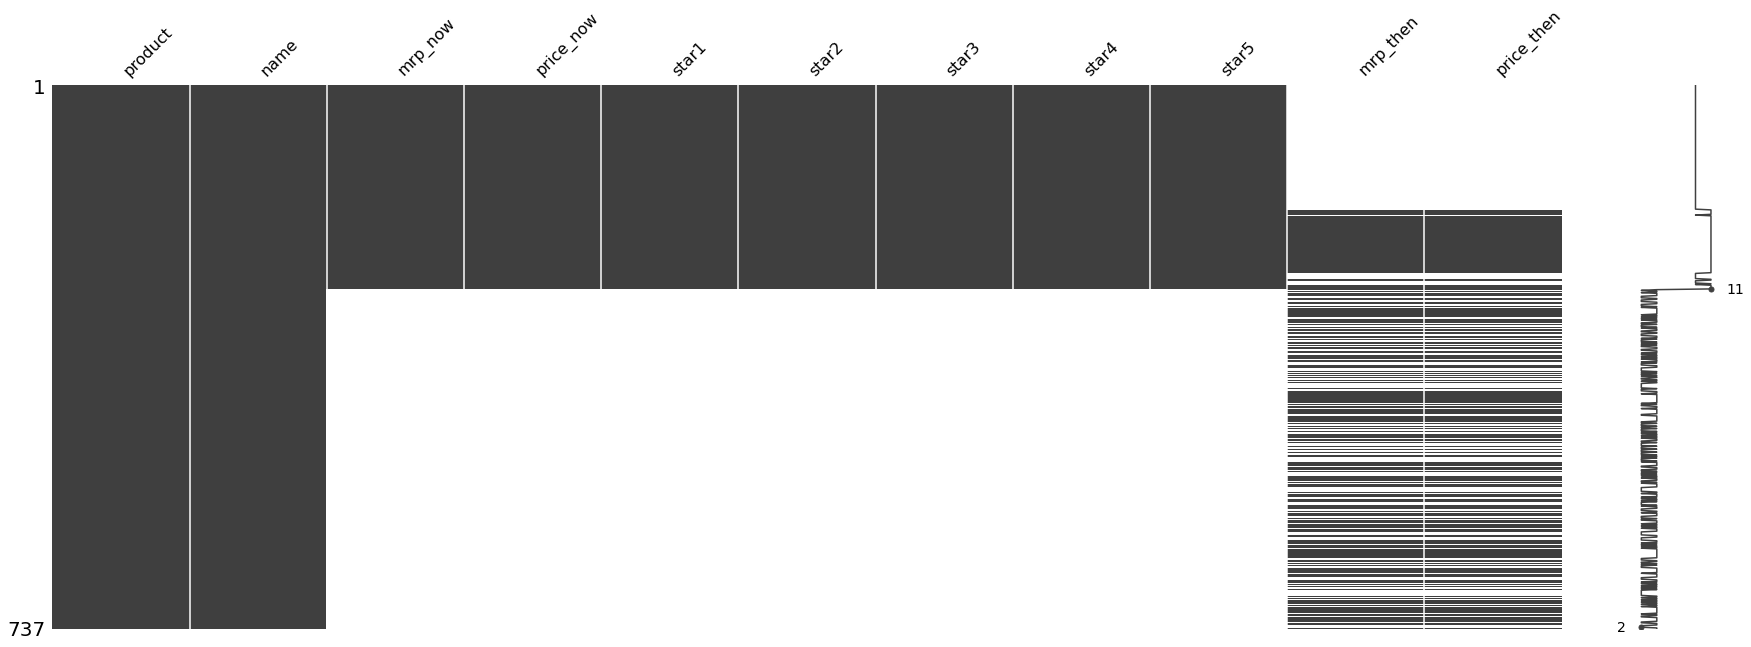

In [ ]:
# missingno 패키지를 통해 확인
missingno.matrix(amz_data, figsize = (30,10))

(737, 9)

In [ ]:
# num_cols : 숫자형 컬럼의 총 개수
num_cols = amz_data.select_dtypes(include=np.number).shape[1]

# 숫자형 컬럼이 모두 NULL 인 행은 삭제
amz_data = amz_data[amz_data.select_dtypes(include=np.number).isnull().sum(axis=1)!=num_cols]

#### 4) 중복값

In [ ]:
# 중복된 항목 수 알아보기
print("중복된 항목 수 :", len(amz_data[amz_data.duplicated()])) 

중복된 항목 수 : 1


In [ ]:
# 중복된 항목 확인
amz_data[amz_data.duplicated(keep = False)].sort_values(by=list(amz_data.columns))

,product,name,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
370,medical equipment,Proexamine Surgicals® Cotton Reusable Ortho Su...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.0,649.0
422,medical equipment,Proexamine Surgicals® Cotton Reusable Ortho Su...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,949.0,649.0


In [ ]:
# 중복된 항목 제거
amz_data.drop_duplicates(inplace=True, keep='first', ignore_index = True)

#### 5) 변수별 시각화

> 분포

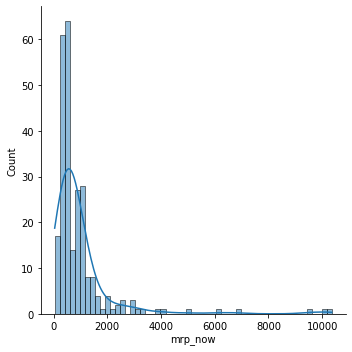

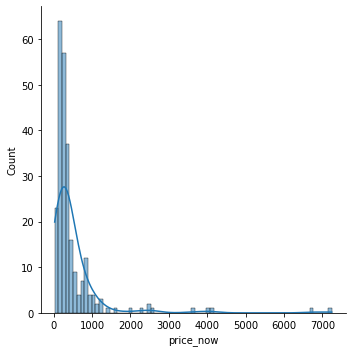

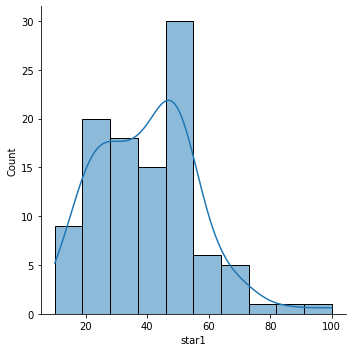

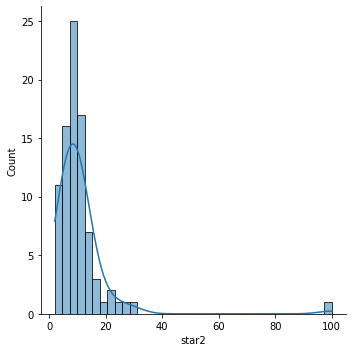

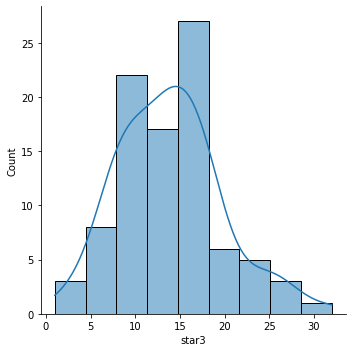

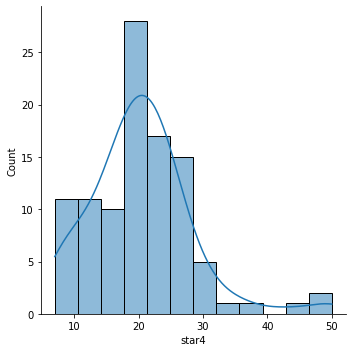

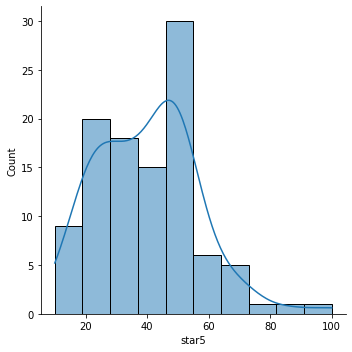

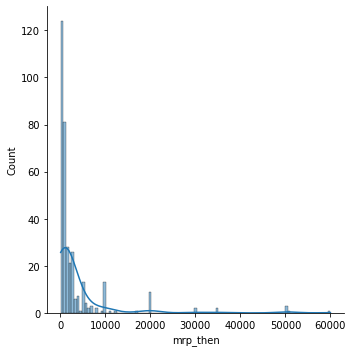

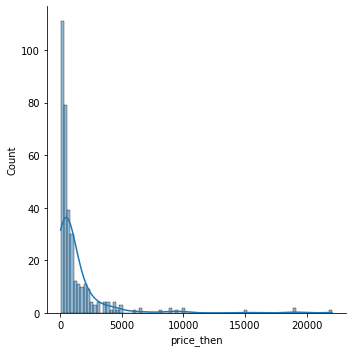

In [ ]:
# 데이터 컬럼 타입이 np.number 인 것만 가져오기
numeric_data = amz_data.select_dtypes(include=np.number)

# 데이터 컬럼 타입이 np.number 인 컬럼 이름들 가져오기
l = numeric_data.columns.values
number_of_columns=4
number_of_rows = len(l)-1/number_of_columns

# 컬럼별 히스토그램 그리기
for i in range(0,len(l)):
    target_data = numeric_data[l[i]]

    # 결측값에 채운 0 을 제외한 데이터 가져오기
    target_data_wo_zero = target_data[target_data>0]
    sns.displot(target_data_wo_zero,kde=True) # kde : kernel density

> Box Plot

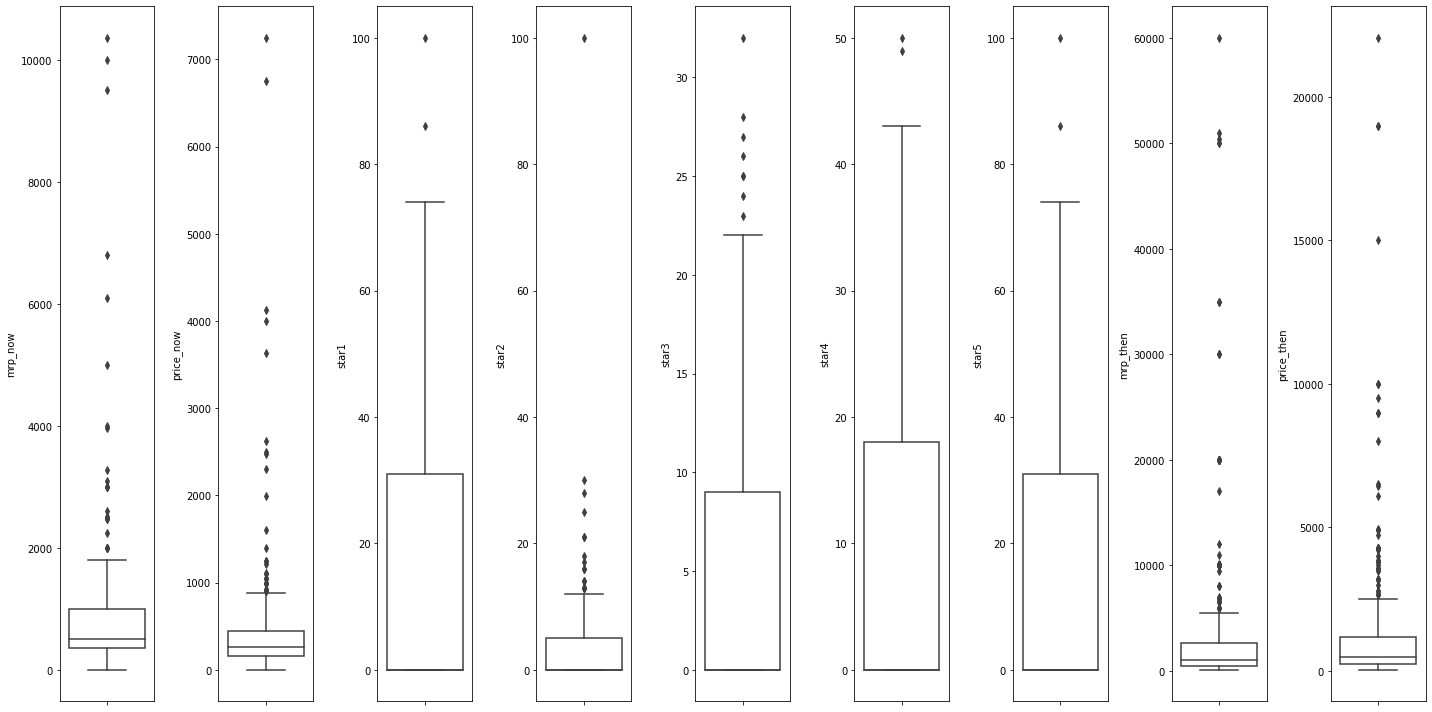

In [ ]:
# 데이터 컬럼 타입이 np.number 인 컬럼들 가져오기
columns = amz_data.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(20, 10))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
    sns.boxplot(y=col, data=amz_data, boxprops={'facecolor': 'None'})
figure.tight_layout() # 자동으로 명시된 여백에 관련된 서브플롯 파라미터를 조정한다.
plt.show()

### 3. 데이터 타입별 Feature 변환

#### 1) Feature 탐색

##### 총 Feature 개수 확인

In [ ]:
print(amz_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     536 non-null    object 
 1   name        536 non-null    object 
 2   mrp_now     277 non-null    float64
 3   price_now   277 non-null    float64
 4   star1       277 non-null    float64
 5   star2       277 non-null    float64
 6   star3       277 non-null    float64
 7   star4       277 non-null    float64
 8   star5       277 non-null    float64
 9   mrp_then    353 non-null    float64
 10  price_then  353 non-null    float64
dtypes: float64(9), object(2)
memory usage: 46.2+ KB
None


##### Feature 데이터 타입별 개수 확인

In [ ]:
# 데이터 타입별 컬럼 수 확인
dtype_data = amz_data.dtypes.reset_index()
dtype_data.columns = ["Count", "Column Type"]
dtype_data = dtype_data.groupby("Column Type").aggregate('count').reset_index()

print(dtype_data)

  Column Type  Count
0     float64      9
1      object      2


#### 3) 숫자형 Feature
  * 데이터 확인
  * Feature 제거

##### 데이터 확인

In [ ]:
# pandas 의 select_dtypes('object') 사용
amz_data.select_dtypes(include=['number']).head()

,mrp_now,price_now,star1,star2,star3,star4,star5,mrp_then,price_then
0,1000.0,151.0,24.0,9.0,13.0,14.0,24.0,NaN,NaN
1,499.0,324.0,27.0,12.0,15.0,17.0,27.0,NaN,NaN
2,349.0,249.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,898.0,799.0,61.0,3.0,6.0,25.0,61.0,NaN,NaN
4,399.0,121.0,19.0,11.0,14.0,16.0,19.0,NaN,NaN


In [ ]:
num_feat = amz_data.select_dtypes('number').columns.values
train_num = amz_data[num_feat].copy()

##### Feature 제거

> Feature 별 유일한 값 개수 확인

In [ ]:
print(train_num.nunique().sort_values())

star2          22
star3          29
star4          30
star1          49
star5          49
mrp_now        91
mrp_then      132
price_now     148
price_then    193
dtype: int64


In [ ]:
print(amz_data.shape)

(536, 11)


> 유일한 값이 1개인 경우 또는 모든 행의 값이 다른 경우는 제거한다

## 03. 제품별 군집분석

#### 1) K-Means Clustering

##### Scailing 과 Elbow 방법 적용

In [ ]:
amz_all=amz_data
amz_all=amz_all.reset_index()

In [ ]:
prd_lists = list(amz_all['product'].unique())
prd_lists

['facemasks',
 'ppe',
 'ppekits',
 'handwash',
 'Bath & Shower',
 'Skin Care',
 'Grocery & Gourmet Foods',
 'medical equipment']

In [ ]:
scaler = StandardScaler()
valid_prd_list = []

for prd in prd_lists:
    df_scaled = scaler.fit_transform(amz_all[['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']][amz_all['product']==prd])
    df_scaled=np.nan_to_num(df_scaled)
    wcss=[]
    try:
        for i in range(1,19):
            kmeans = KMeans(n_clusters= i)
            kmeans.fit(df_scaled)
            wcss.append(kmeans.inertia_)

        plt.title(prd)
        plt.plot(wcss, 'bx-')
        plt.show()
        valid_prd_list.append(prd)
    except:
        print(prd+' : '+str(sys.exc_info()))

NameError: ignored

#### 2) 제품-클러스터별 변수 분포도

facemasks


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.



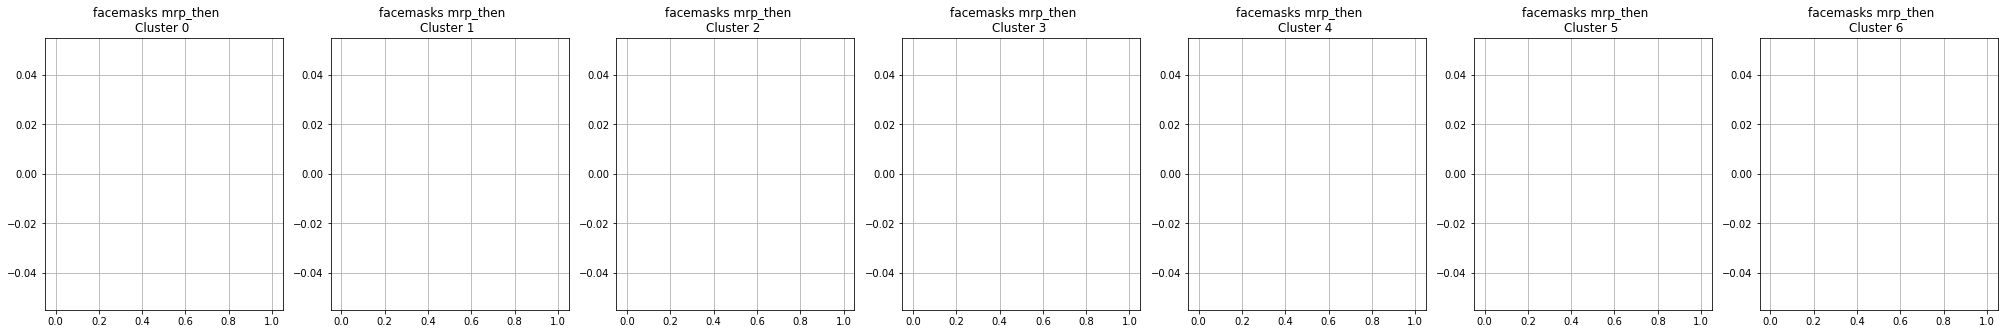

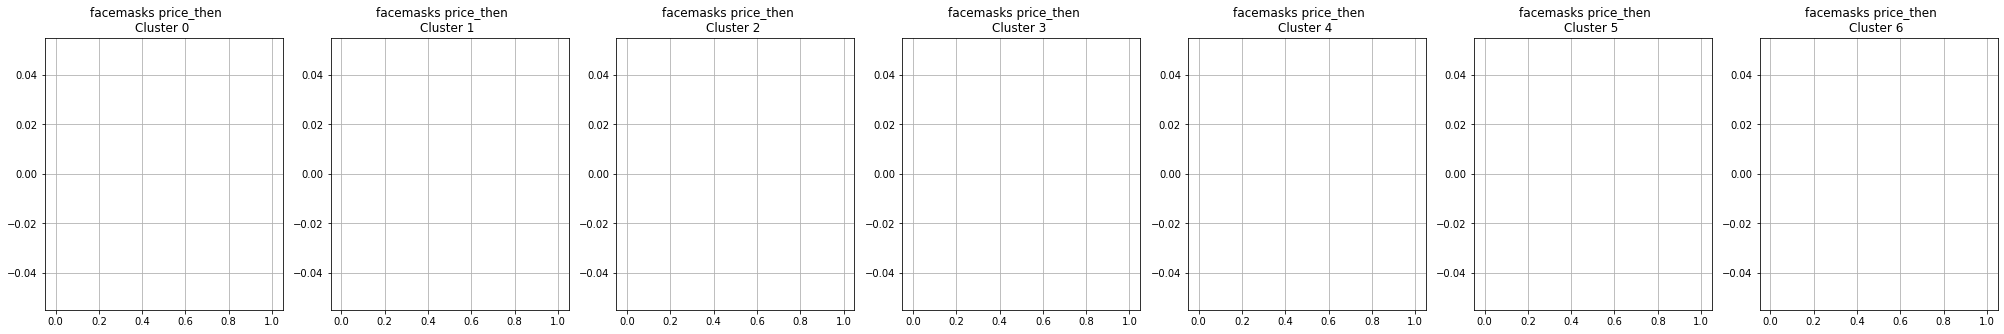

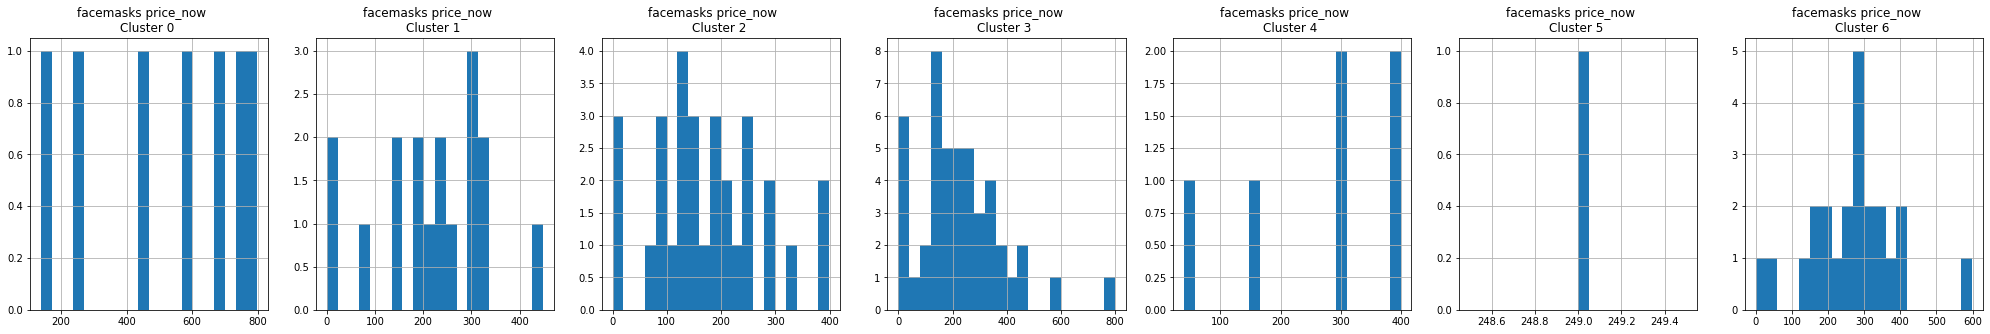

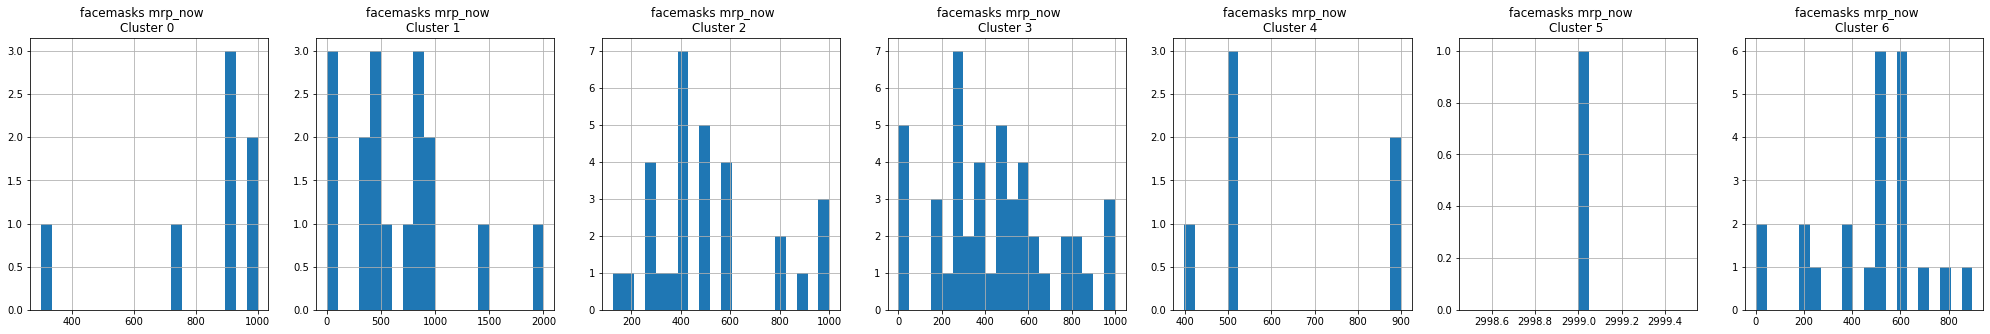

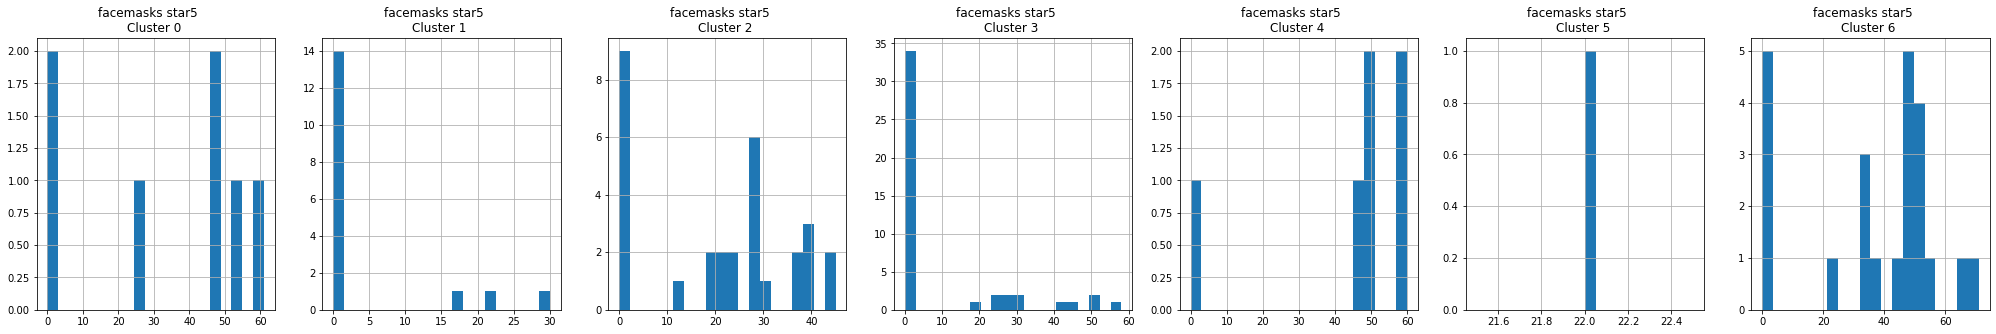

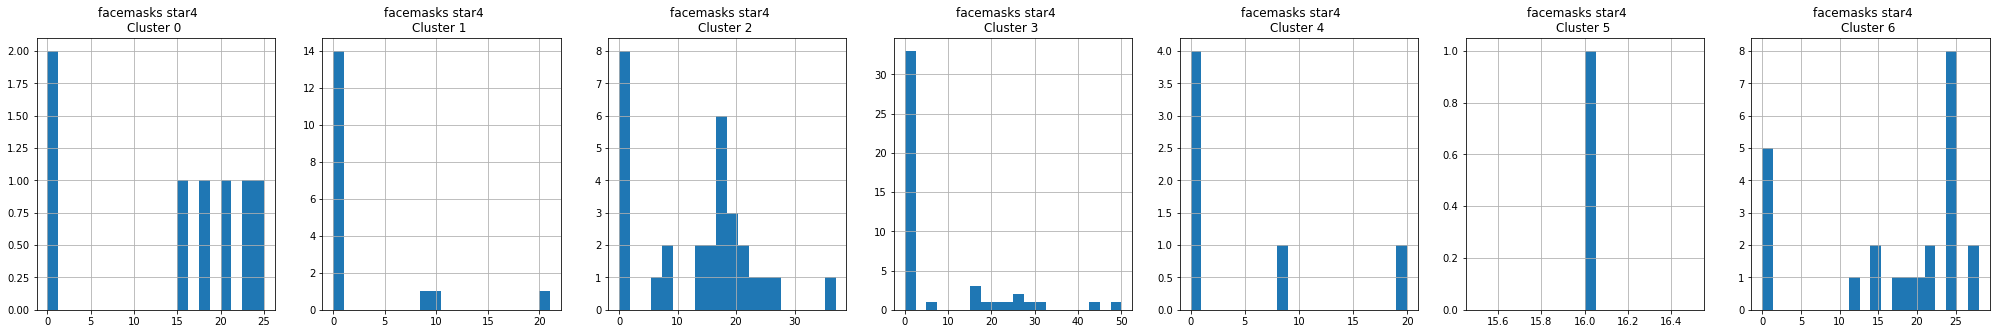

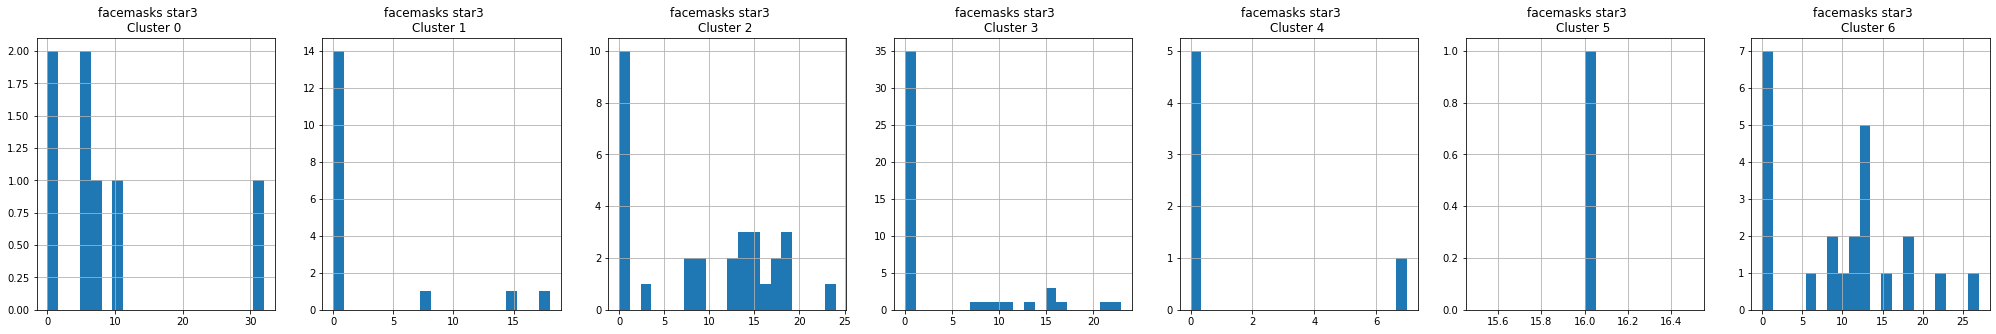

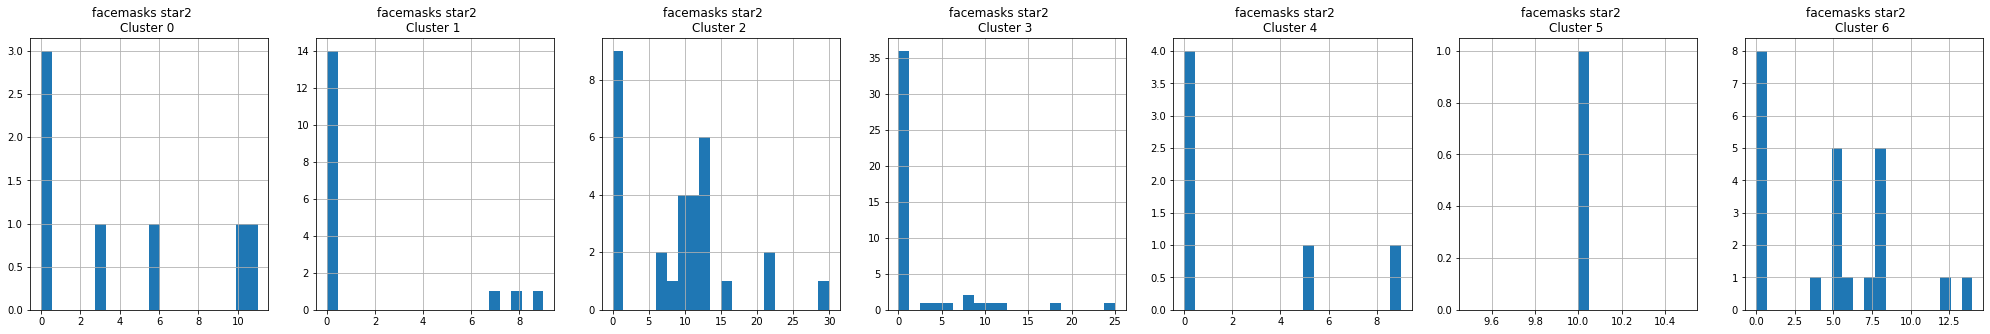

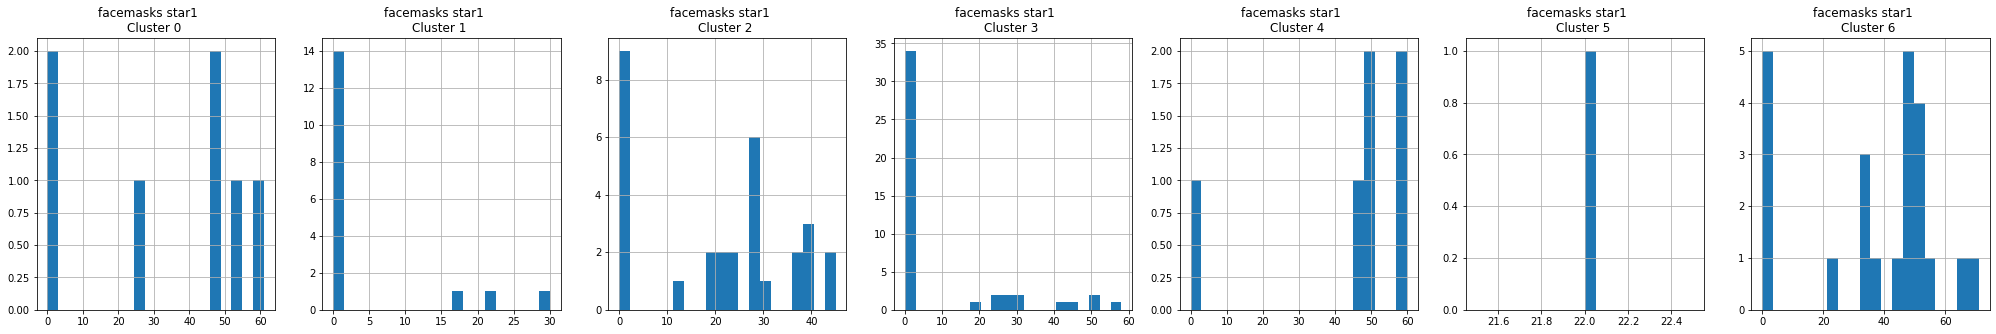

Skin Care


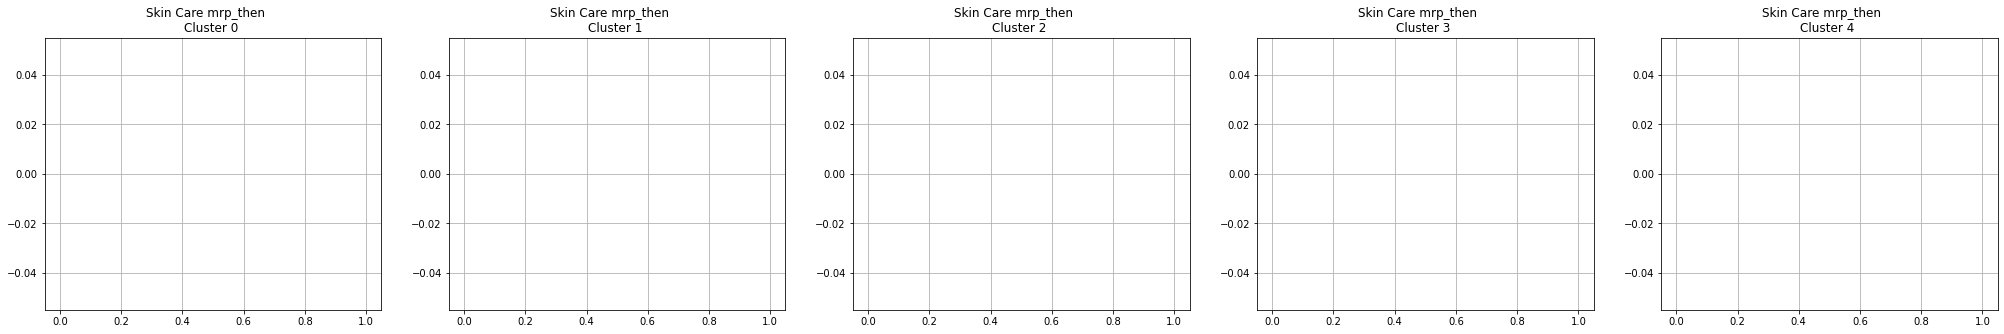

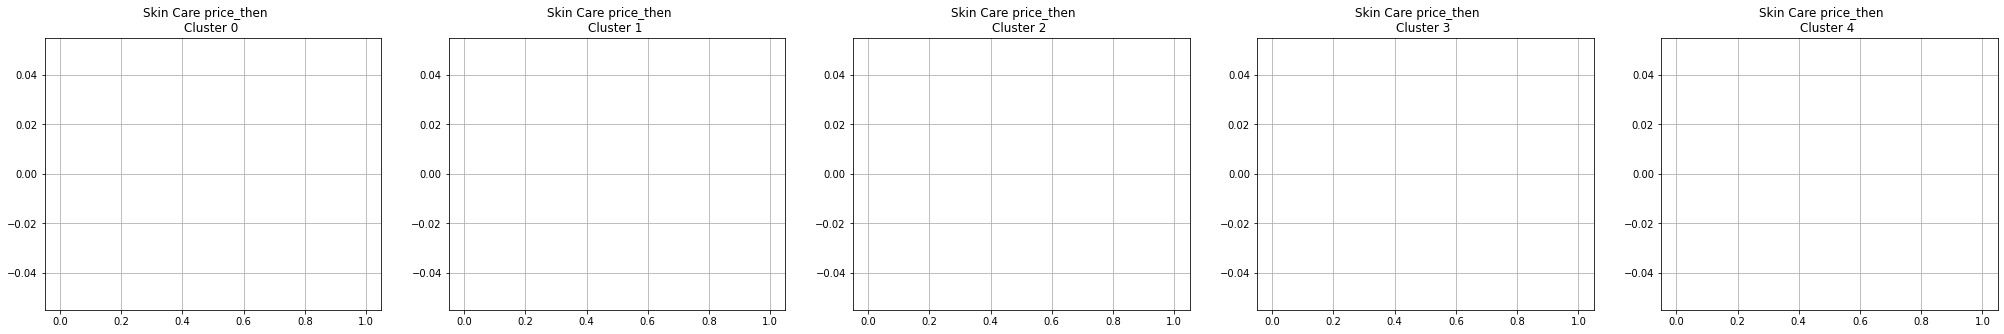

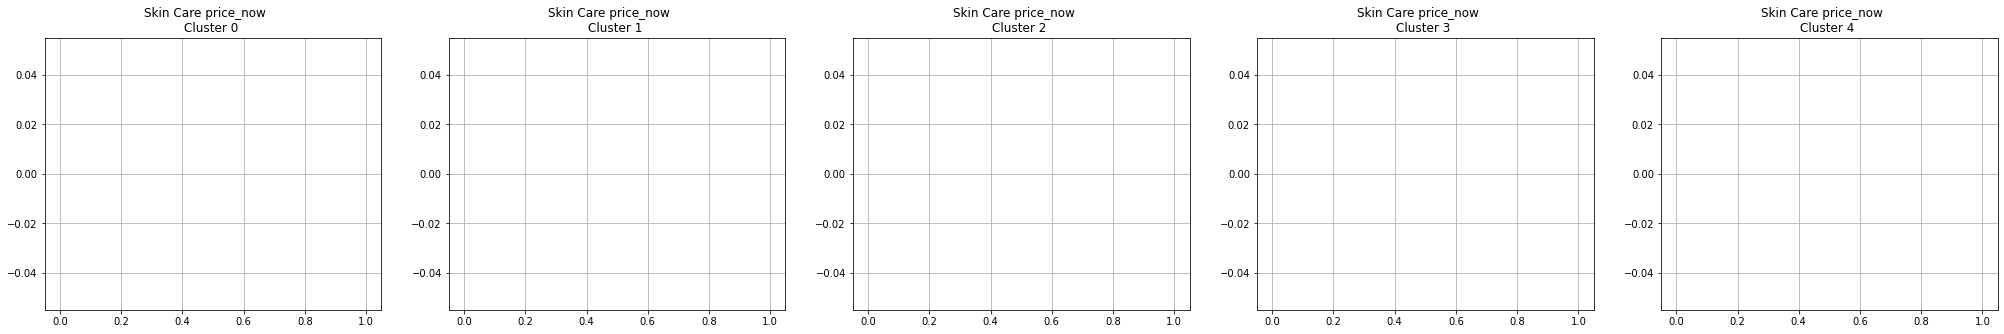

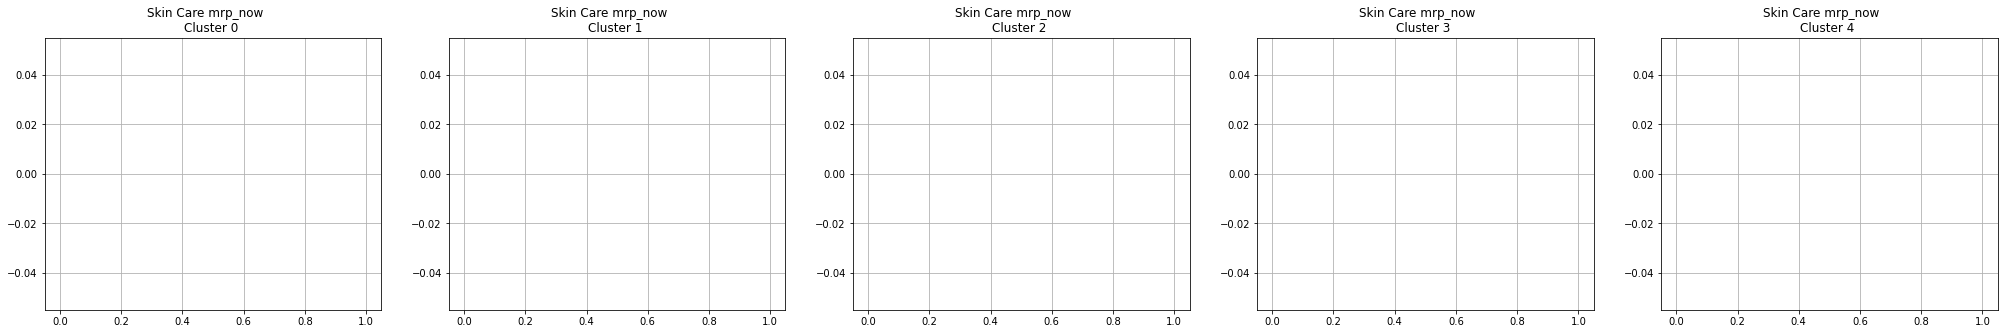

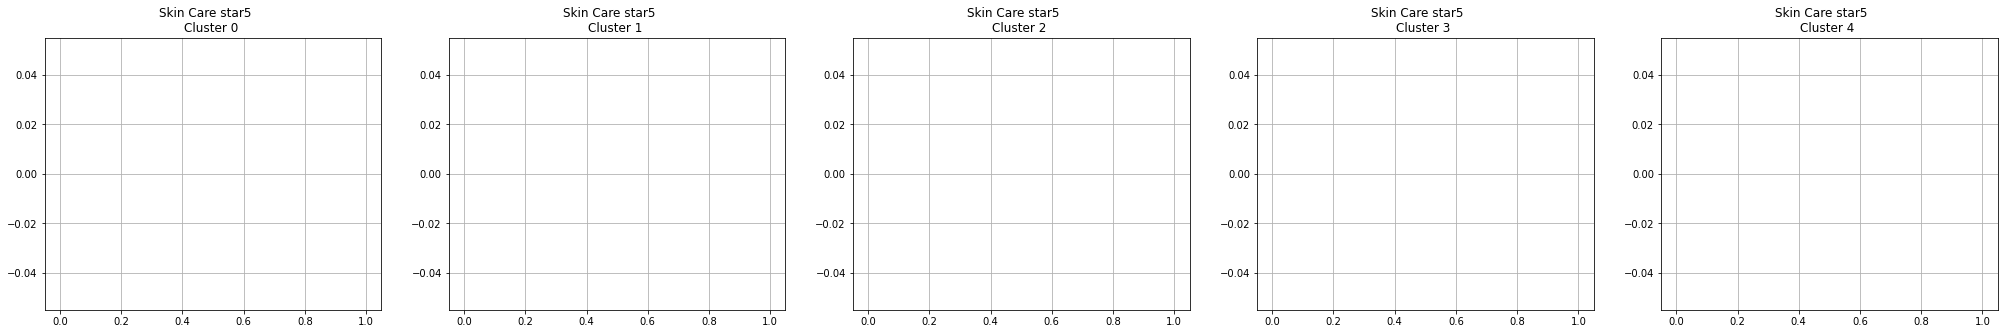

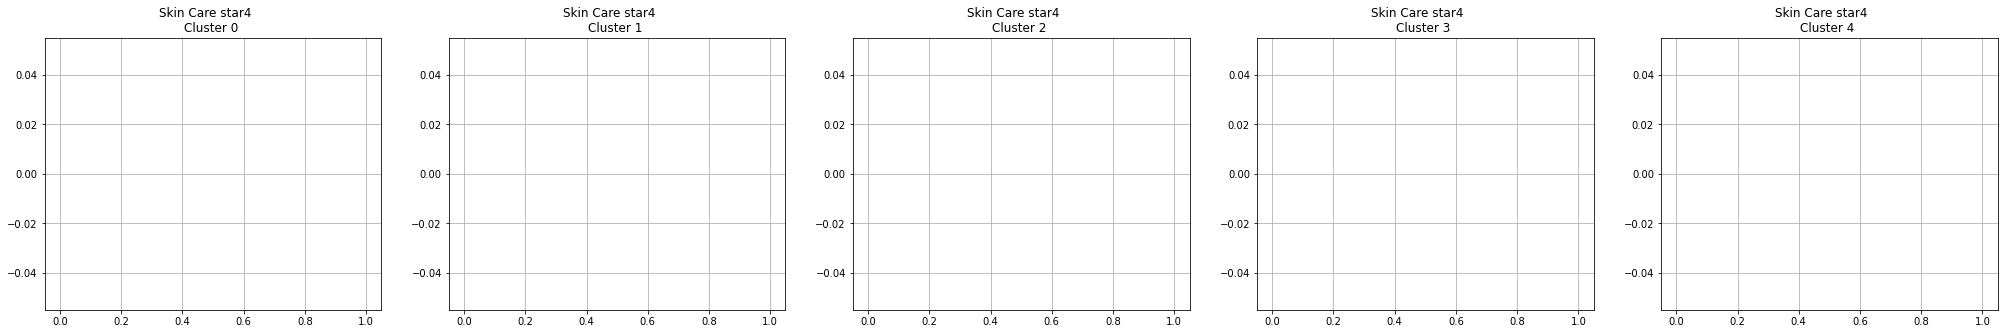

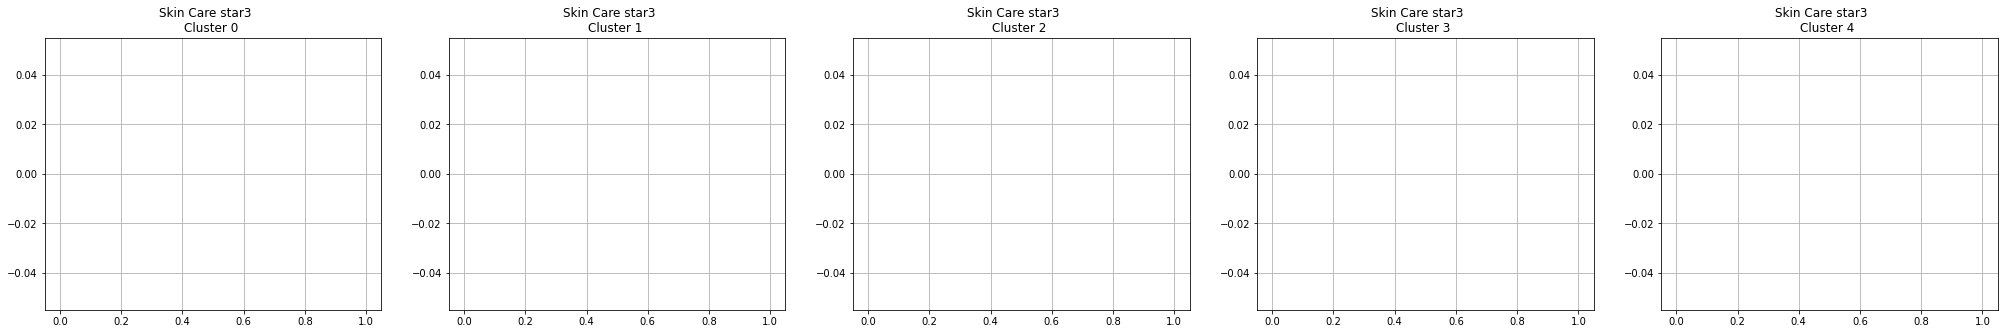

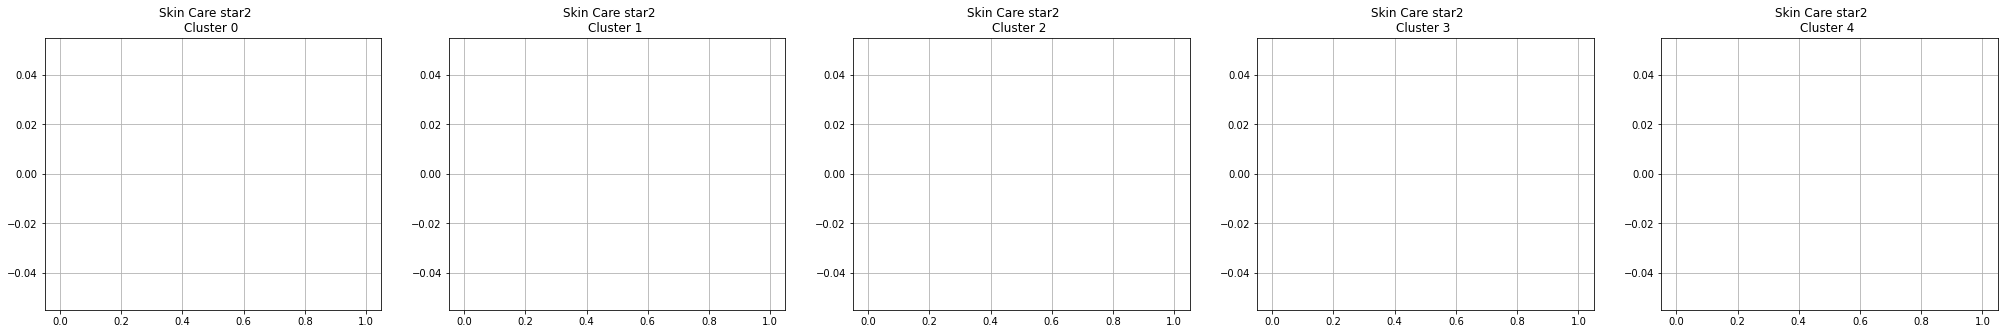

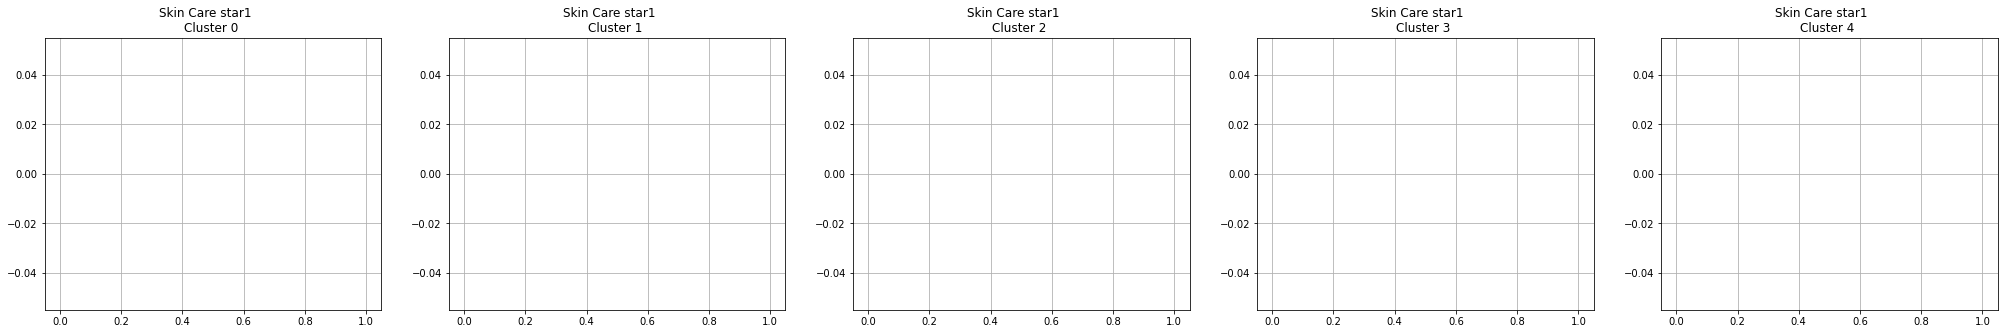

medical equipment


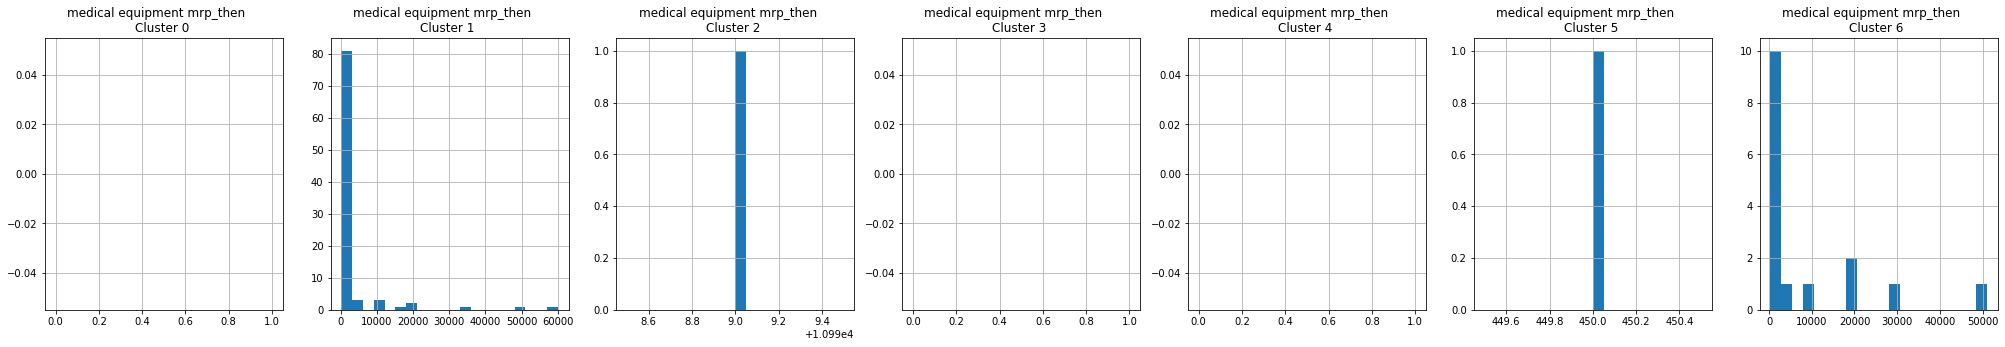

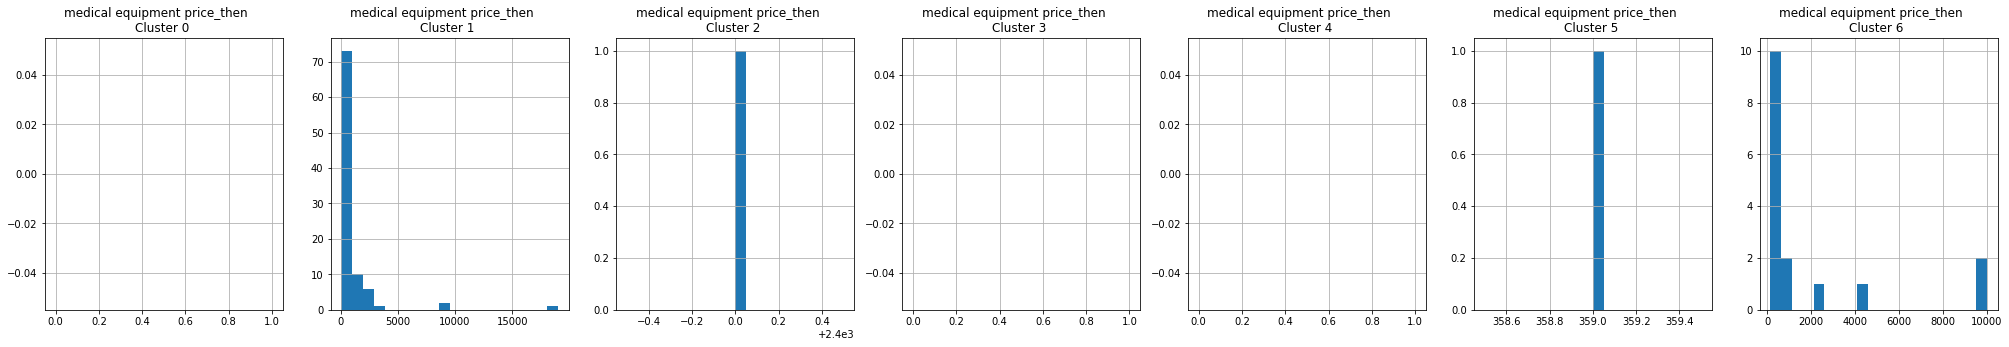

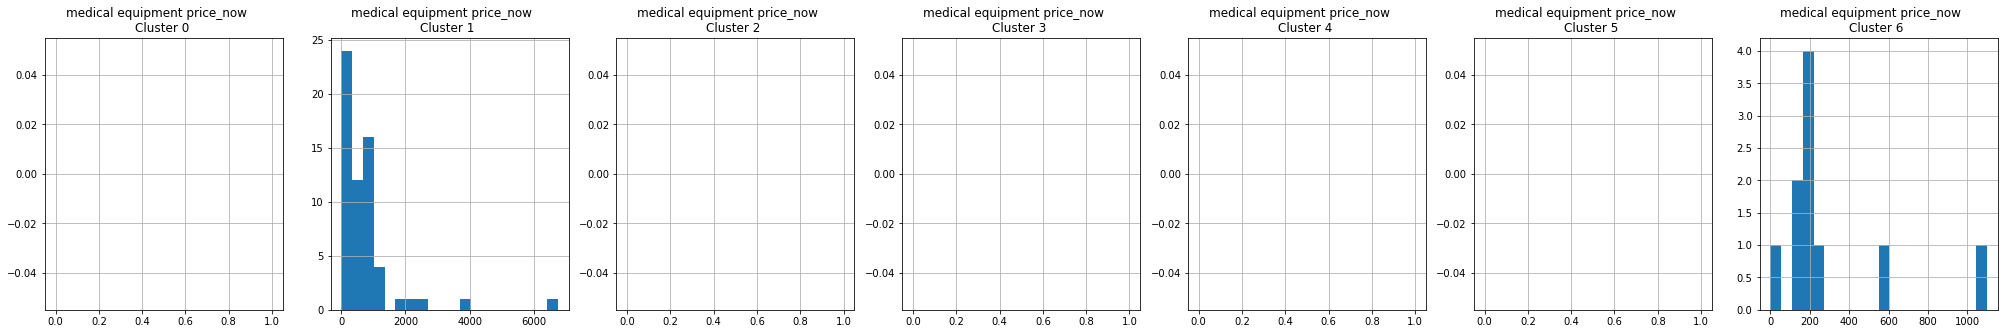

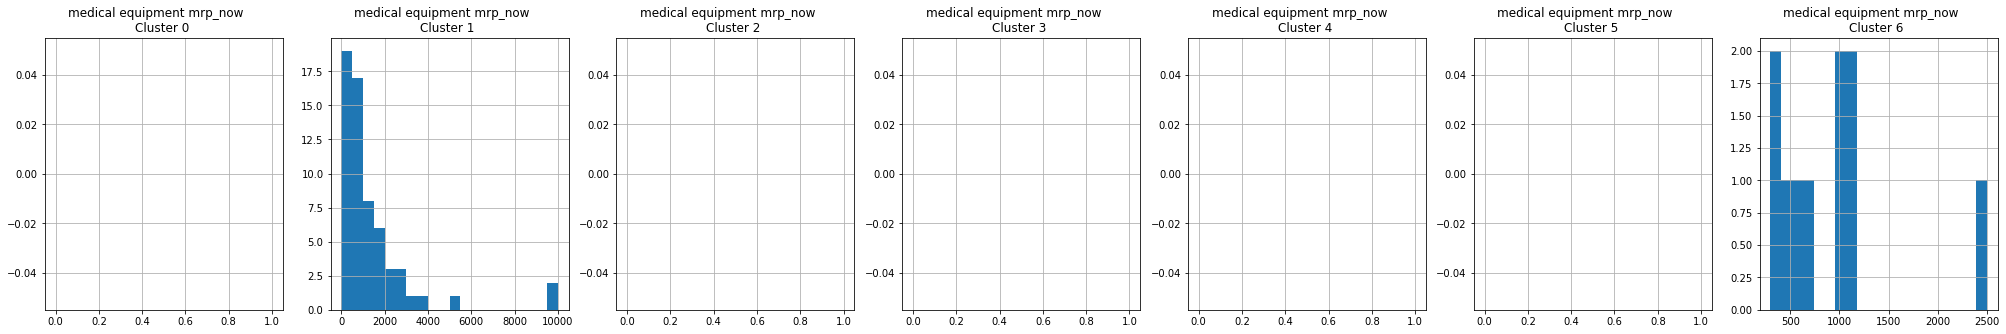

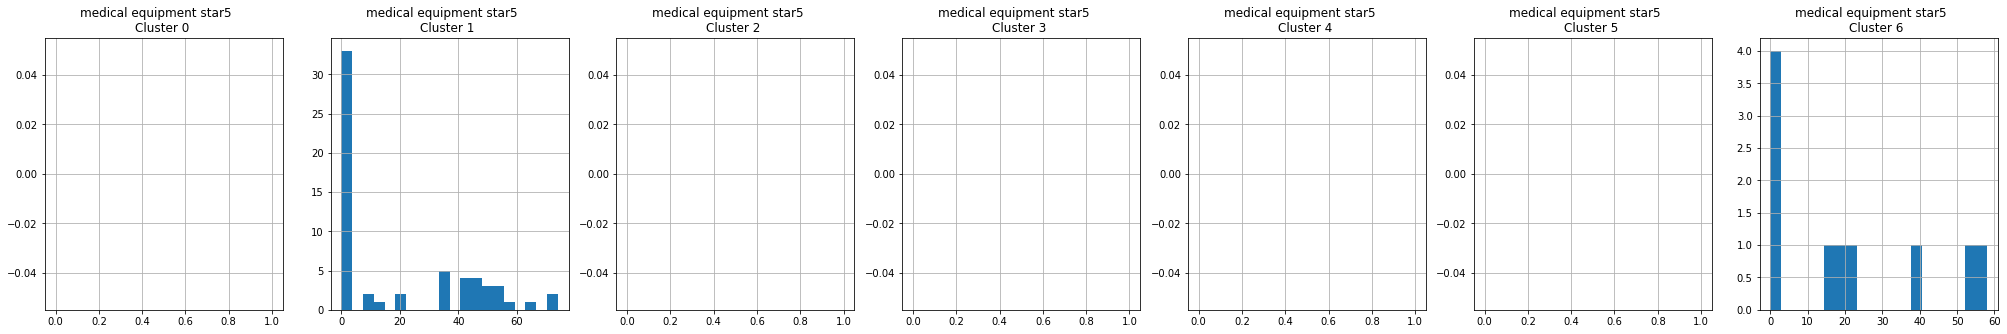

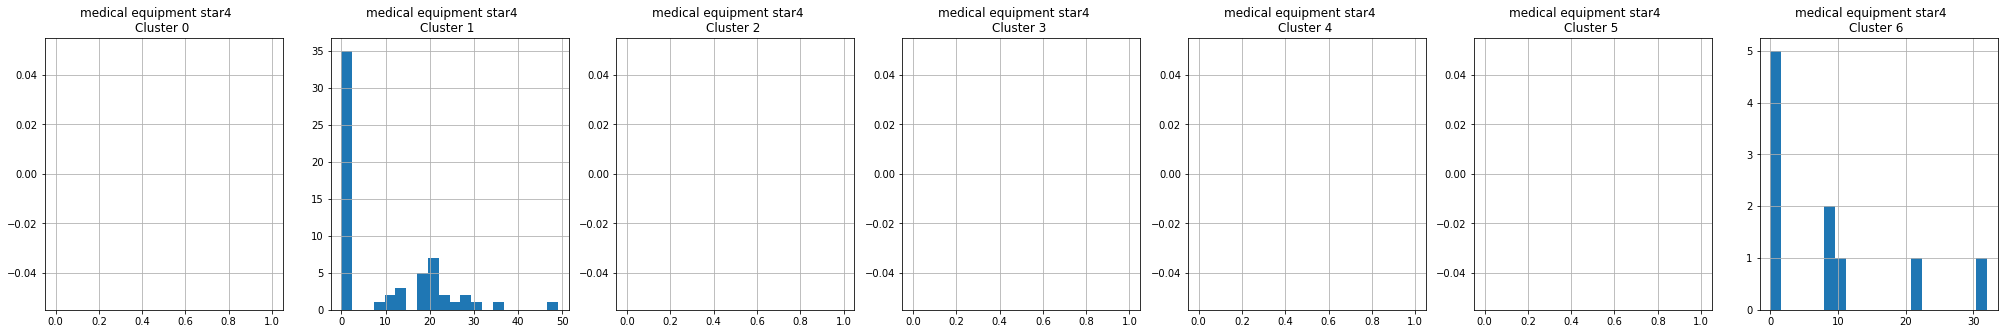

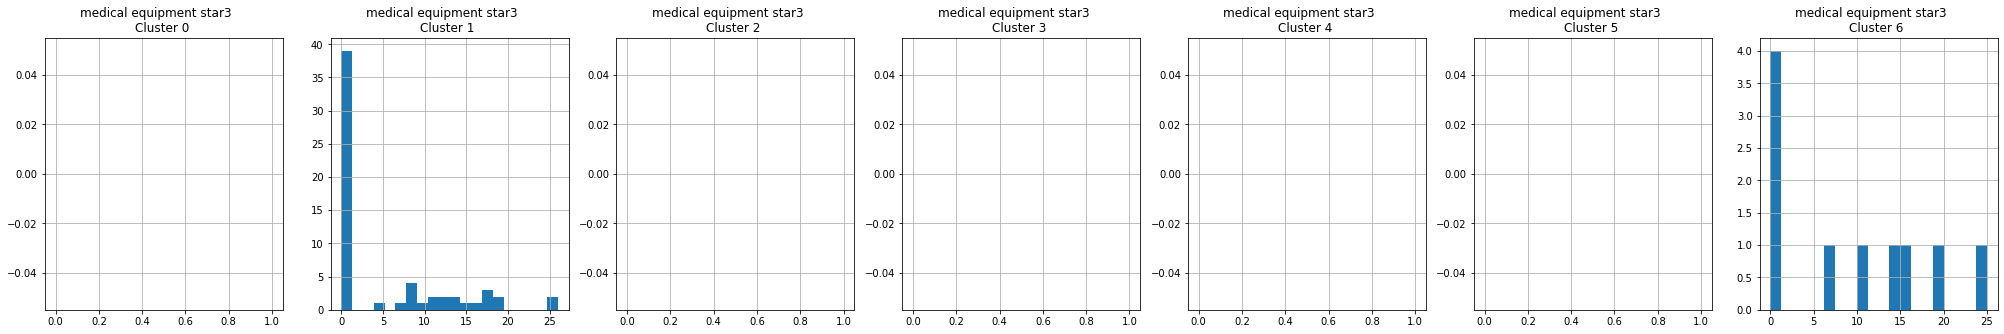

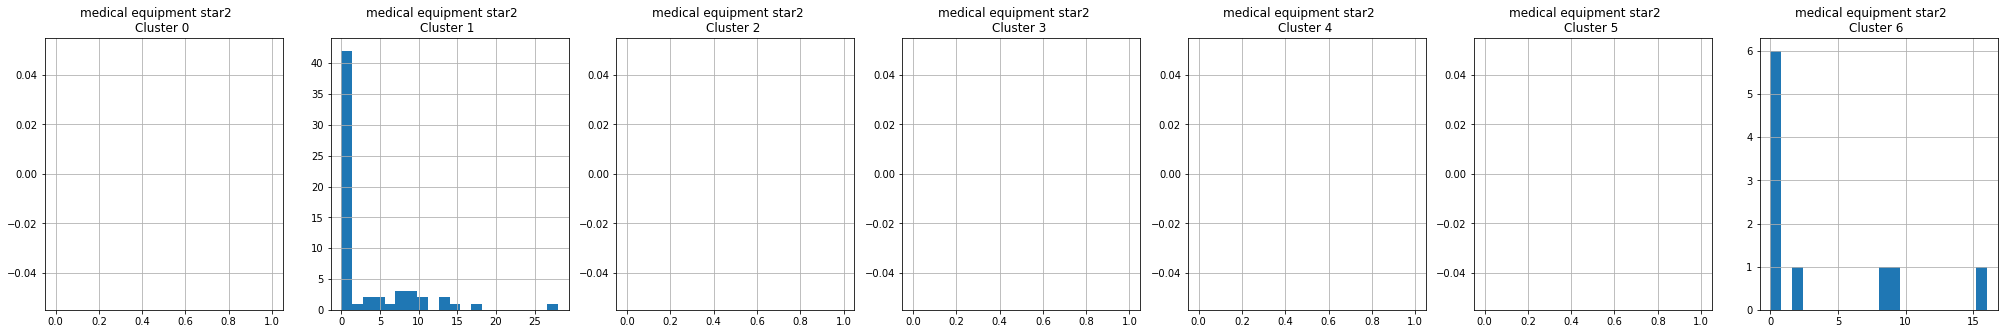

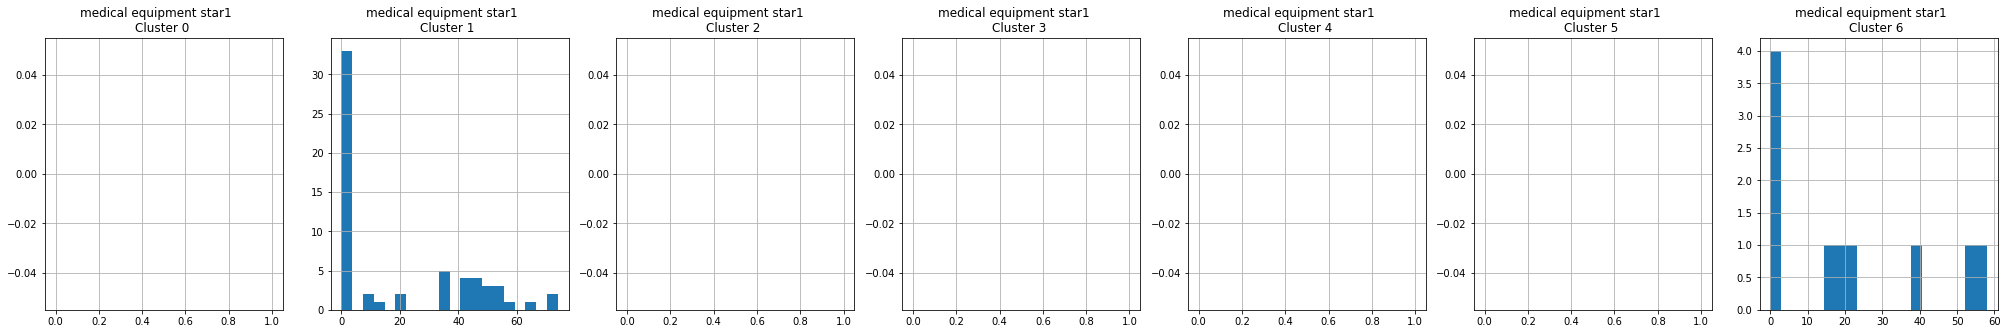

In [ ]:
columnsss_amz=['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']
kmeans_dict_amz={'medical equipment':7,'Skin Care': 5, 'facemasks':7}
labels_dict_amz={}
for prd in list(valid_prd_list):
    print(prd)
    df_scaled = scaler.fit_transform(amz_all[columnsss_amz][amz_all['product']==prd])
    df_scaled=np.nan_to_num(df_scaled)
    kmeans = KMeans(kmeans_dict_amz[prd])
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    labels_dict_amz[prd]=labels
    cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = columnsss_amz)
    df_cluster = pd.concat([amz_all[columnsss_amz][amz_all['product']==prd], pd.DataFrame({'cluster':labels})], axis = 1)
    for j in columnsss_amz:
        plt.figure(figsize = (35, 5))
        for k in range(kmeans_dict_amz[prd]):
            plt.subplot(1,kmeans_dict_amz[prd],k+1)
            cluster = df_cluster[df_cluster['cluster'] == k]
            cluster[j].hist(bins = 20)
            plt.title(prd+' {}    \nCluster {} '.format(j,k))
        
        plt.show()


#### 3) 클러스터-PCA 분석

medical equipment


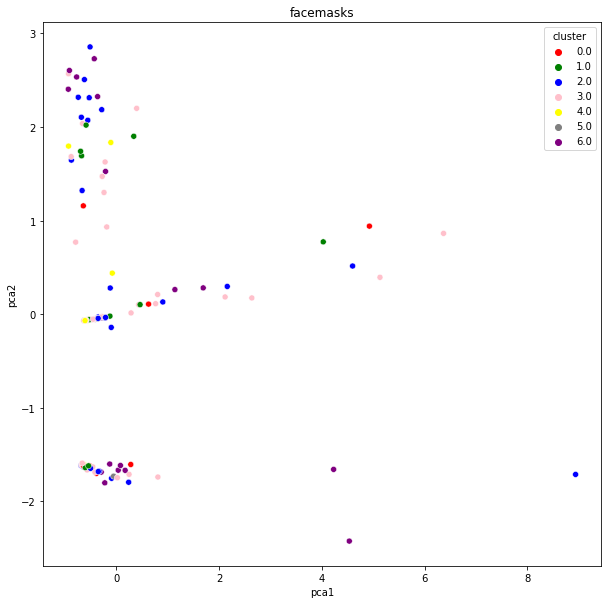

medical equipment


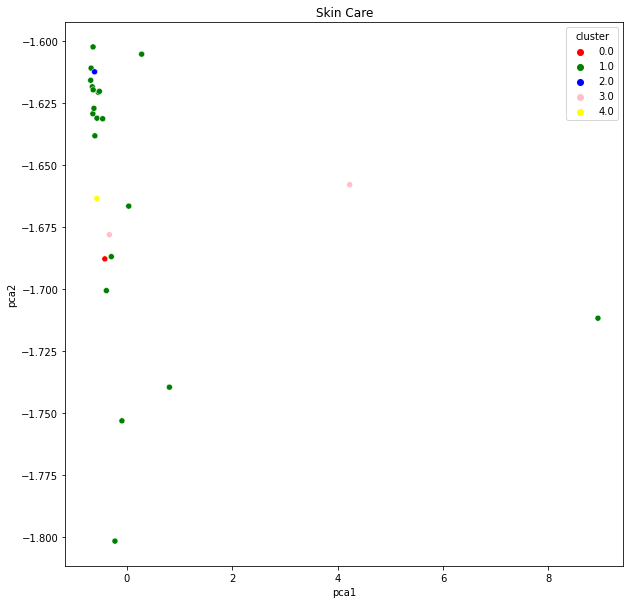

medical equipment


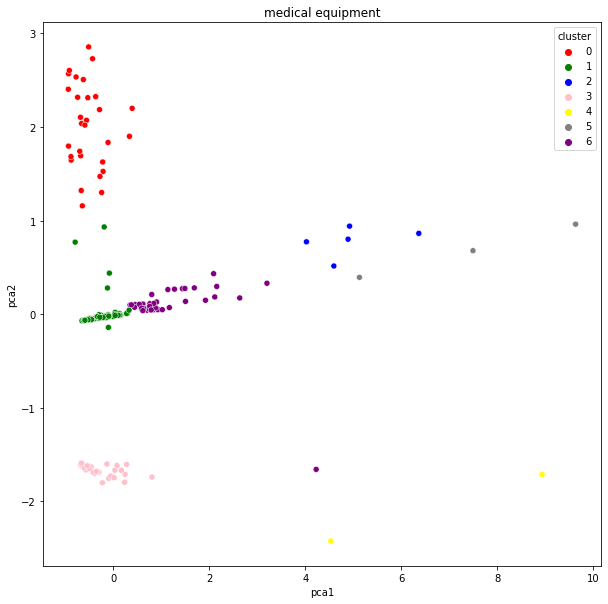

In [ ]:
palette =['red','green','blue','pink','yellow','gray','purple','black', 'magenta','cyan' ]
for prd in valid_prd_list:
    print(i)
    df_scaled = scaler.fit_transform(amz_all[['mrp_then','price_then','price_now','mrp_now','star5',"star4",'star3','star2','star1']][amz_all['product']==i])
    df_scaled=np.nan_to_num(df_scaled)

    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(df_scaled)
    pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
    pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels_dict_amz[prd]})], axis = 1)

    plt.figure(figsize=(10,10))
    ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette=palette[:kmeans_dict_amz[prd]])
    plt.title(prd)
    plt.show()

## 04. 구매 선호도 예측 분석

### 1) Target Feature 생성

In [ ]:
buyability=[]
for i in range(amz_all.shape[0]):
    averaged_score = (amz_all['star1'][i]*(1/15))+(amz_all['star2'][i]*(2/15))+(amz_all['star3'][i]*(3/15))+(amz_all['star4'][i]*(4/15))+(amz_all['star5'][i]*(5/15))
    try:
        averaged_score=int(averaged_score)
    except:
        averaged_score=0
    buyability.append(averaged_score)

amz_all['buyability']=buyability

### 2) 결측값 처리

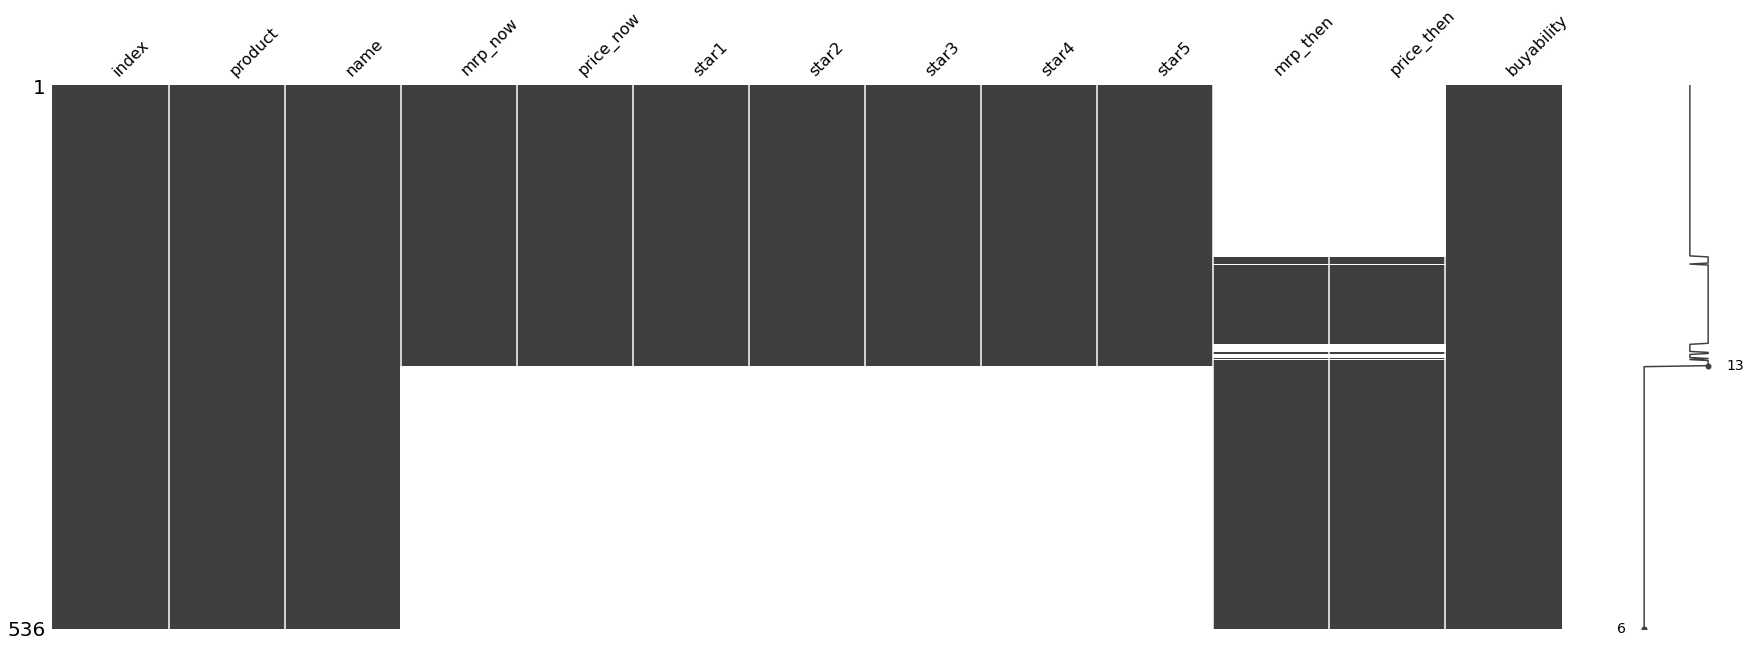

In [ ]:
missingno.matrix(amz_all, figsize = (30,10))

In [ ]:
amz_all.fillna(0, inplace = True)

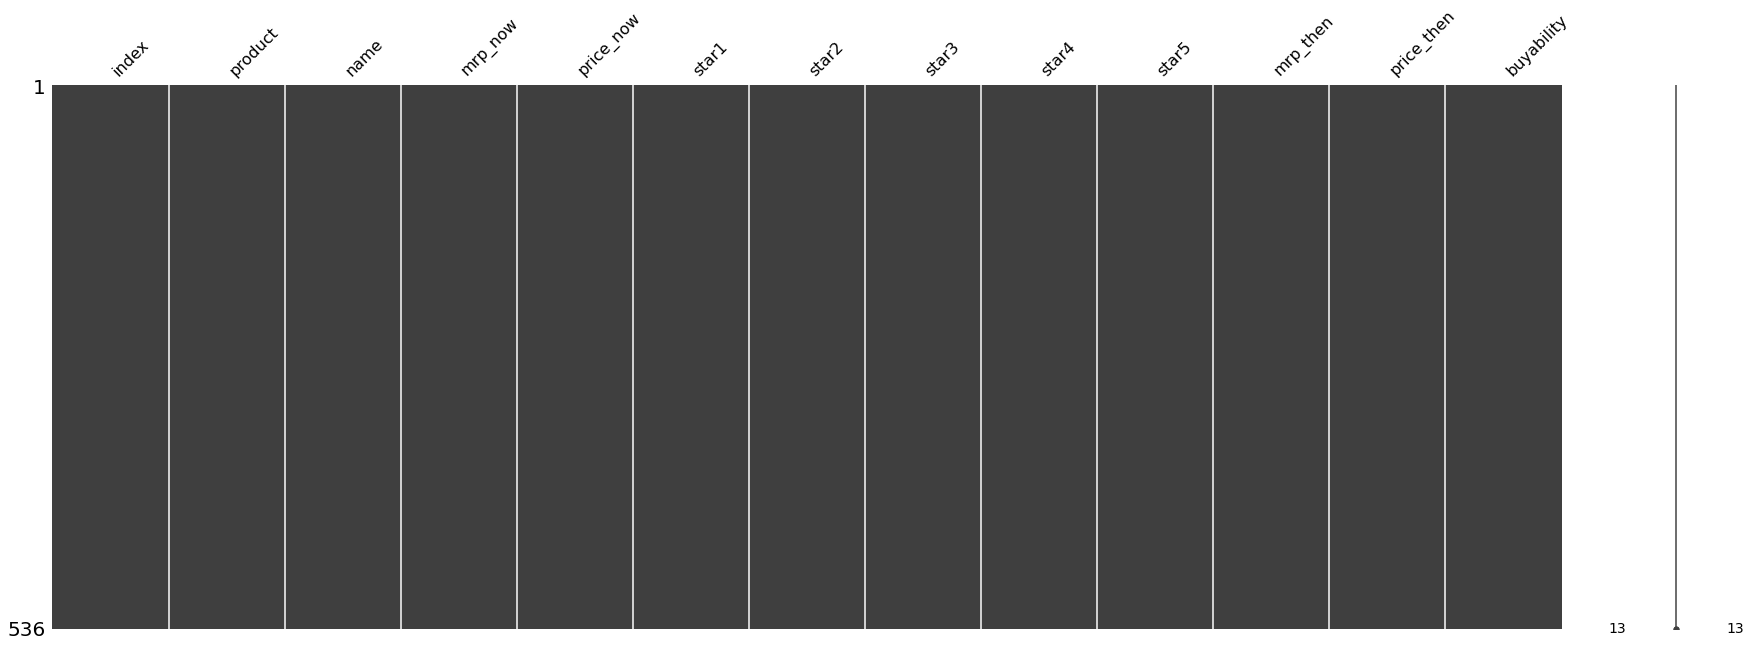

In [ ]:
missingno.matrix(amz_all, figsize = (30,10))

### 3) 데이터 준비

In [ ]:
X=amz_all[amz_all.columns[2:-1]]
y=amz_all['buyability']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=85)

In [ ]:
X_train = X_train.drop(['name'], axis=1, errors='ignore')
x_test = x_test.drop(['name'], axis=1, errors='ignore')

In [ ]:
y_test

493     0
270    17
293     0
336     0
519     0
       ..
500     0
366     0
346     0
142     0
60     30
Name: buyability, Length: 179, dtype: int64

### 4) Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7932960893854749


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### 5) SVM

> Scailing

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train[:5,:]

array([[-0.16718068, -0.32321323,  1.18670829,  2.64693159,  2.77527509,
         1.537597  ,  1.18670829, -0.32253725, -0.42091205],
       [-0.5486876 , -0.0477379 , -0.44715562, -0.37611691, -0.41219903,
        -0.43569042, -0.44715562, -0.32253725, -0.42091205],
       [-0.5486876 , -0.50609182, -0.44715562, -0.37611691, -0.41219903,
        -0.43569042, -0.44715562,  7.80232896, 11.56910237],
       [ 0.08800789,  0.40598617,  1.79184307,  1.63924876,  1.53570182,
         2.11797565,  1.79184307, -0.32253725, -0.42091205],
       [-0.5486876 , -0.50609182, -0.44715562, -0.37611691, -0.41219903,
        -0.43569042, -0.44715562, -0.23387303, -0.23059437]])

In [ ]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.8263305322128851


> 다양한 SVM Kernel 모델링

In [ ]:
for k in ('linear', 'poly','rbf','sigmoid'):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.9411764705882353
poly
0.957983193277311
rbf
0.876750700280112
sigmoid
0.8263305322128851


> Best Model

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test = scaler.transform(x_test)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8324022346368715
